# Mall Customer Segmentation

Data from: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

## Data Load

In [2]:
df = pd.read_csv(r'Data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analysis

##### Histograms

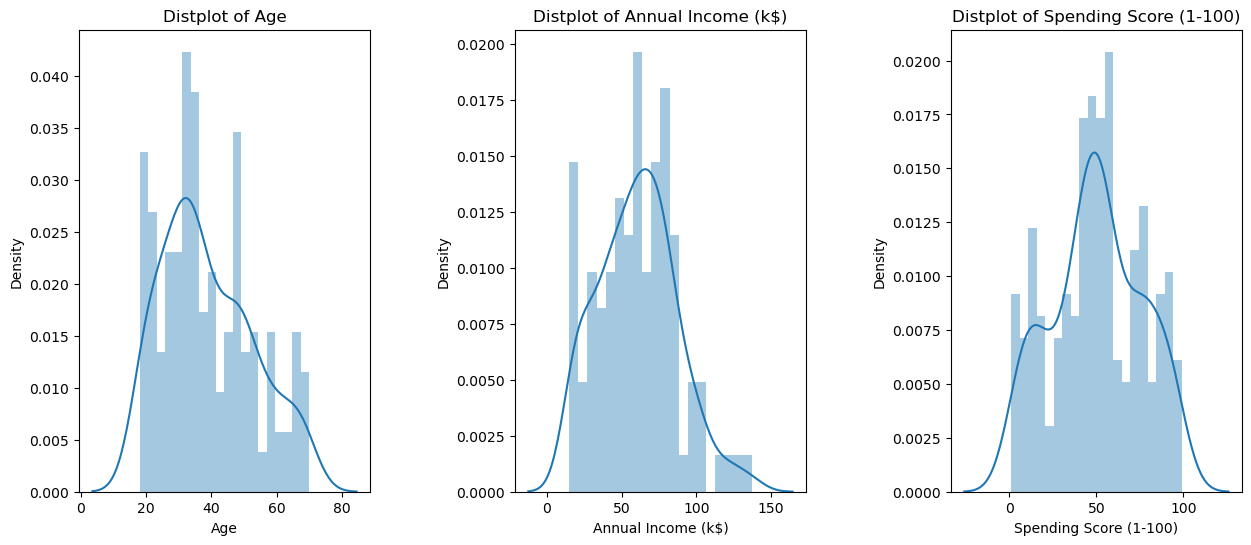

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

##### Count of Gender

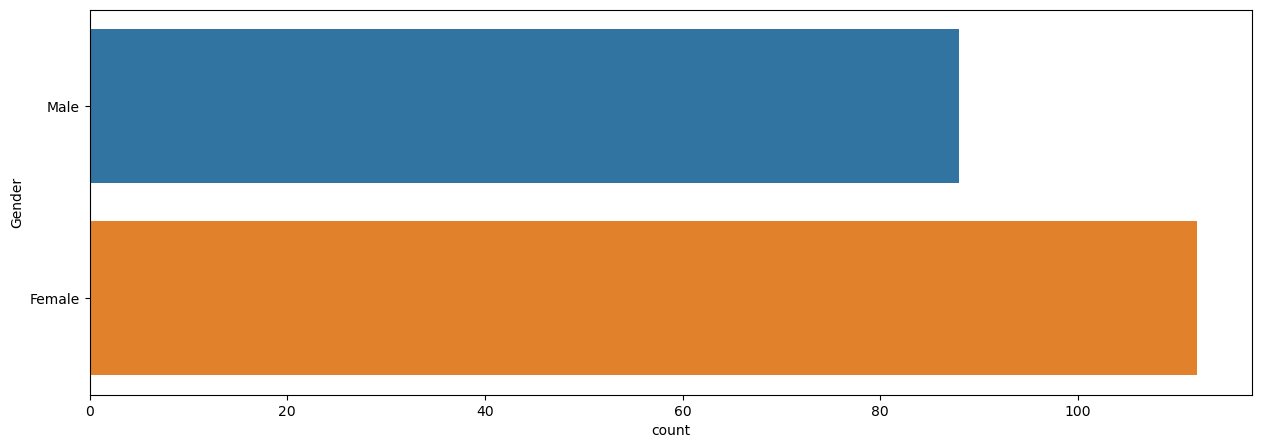

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

##### Relation between Age, Annual Income and Spending Score

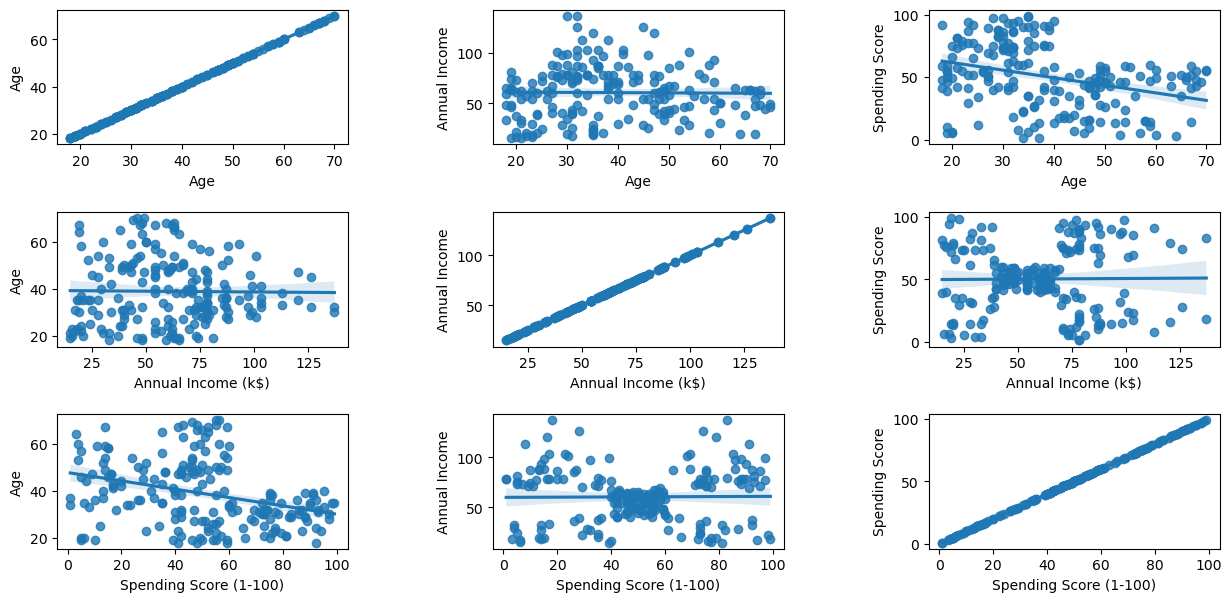

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

#### Distribution of values in Age, Annual Income and Spending Score according to Gender

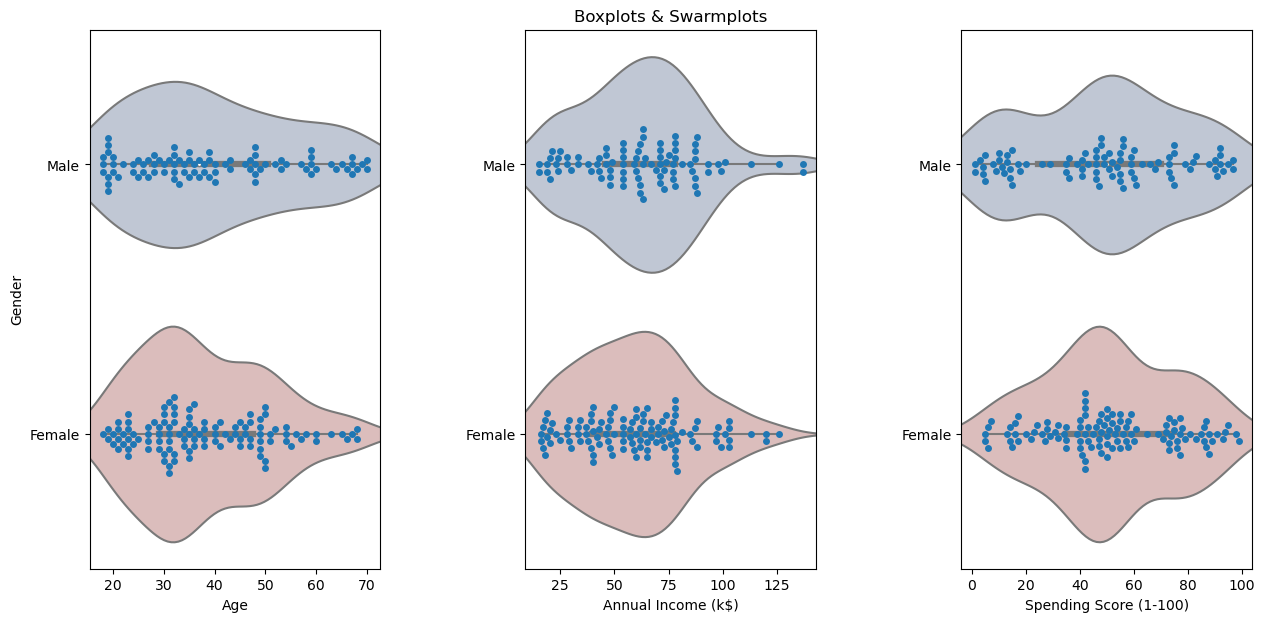

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering

### KMeans

In [11]:
from clustering import KMeans #custom KMeans clustering class

# Initialize KMeans object
kmeans = KMeans(df)

#### Determining Number of Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


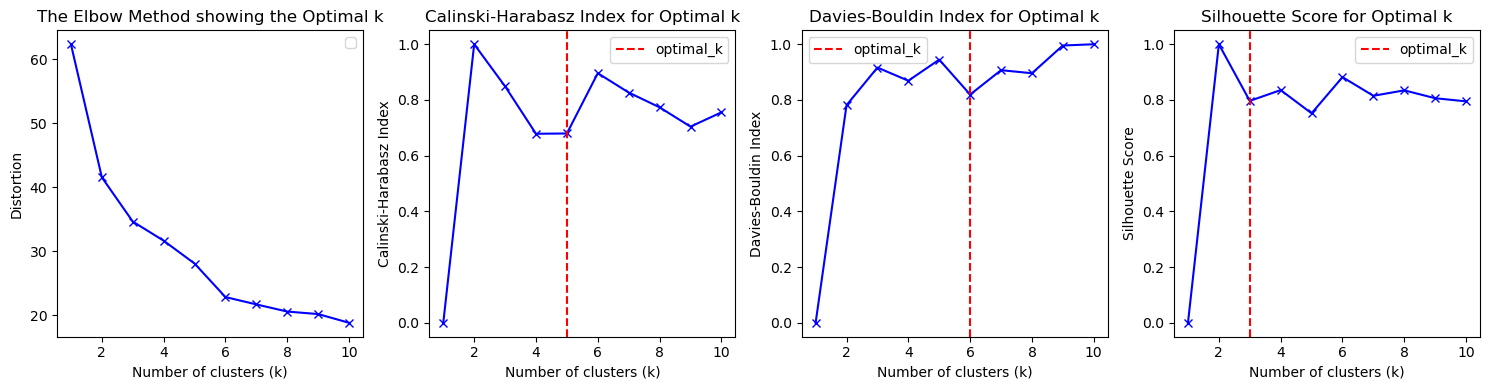

calinski_harabasz_index number of clusters: 5
davies_bouldin_index number of clusters: 6
silhouette_score number of clusters: 3


In [12]:
# Find optimal number of clusters
ch_optimal_k, db_optimal_k, silhouette_optimal_k = kmeans.find_optimal_clusters(max_k=10)
print(f'calinski_harabasz_index number of clusters: {ch_optimal_k}')
print(f'davies_bouldin_index number of clusters: {db_optimal_k}')
print(f'silhouette_score number of clusters: {silhouette_optimal_k}')

In [13]:
# Fit the KMeans model with the selected number of clusters
kmeans.n_clusters = 6
kmeans.fit()

# Predict cluster labels
labels = kmeans.predict(kmeans.X)

#### Visualize Clusters

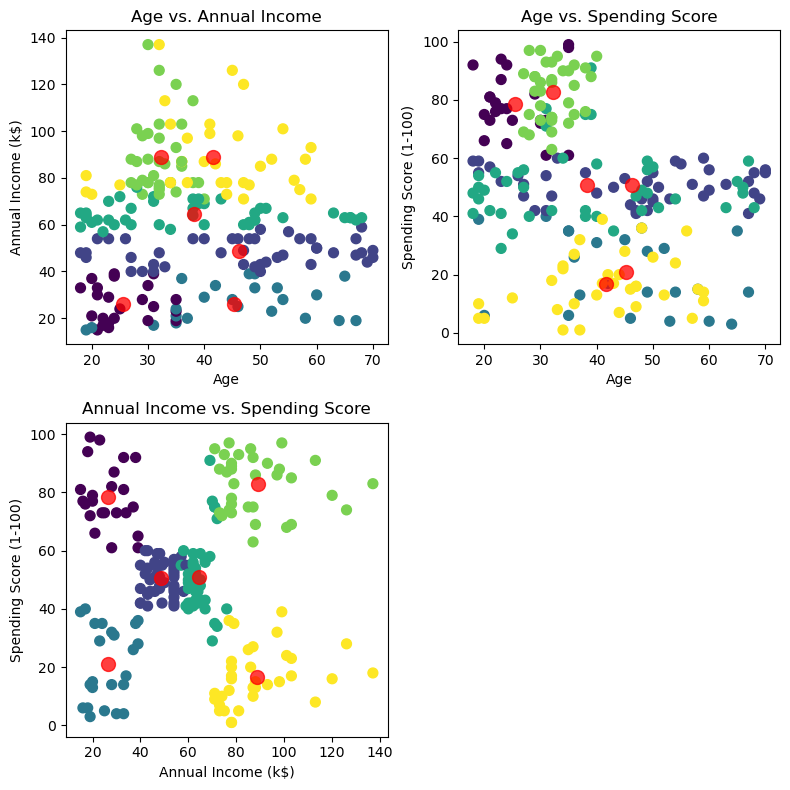

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot Age vs. Annual Income
axs[0, 0].scatter(df['Age'], df['Annual Income (k$)'], c=labels, s=50, cmap='viridis')
axs[0, 0].scatter(kmeans.centroids[:, 1], kmeans.centroids[:, 2], c='red', s=100, alpha=0.75)
axs[0, 0].set_title('Age vs. Annual Income')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Annual Income (k$)')

# Plot Age vs. Spending Score
axs[0, 1].scatter(df['Age'], df['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
axs[0, 1].scatter(kmeans.centroids[:, 1], kmeans.centroids[:, 3], c='red', s=100, alpha=0.75)
axs[0, 1].set_title('Age vs. Spending Score')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Spending Score (1-100)')

# Plot Annual Income vs. Spending Score
axs[1, 0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
axs[1, 0].scatter(kmeans.centroids[:, 2], kmeans.centroids[:, 3], c='red', s=100, alpha=0.75)
axs[1, 0].set_title('Annual Income vs. Spending Score')
axs[1, 0].set_xlabel('Annual Income (k$)')
axs[1, 0].set_ylabel('Spending Score (1-100)')

# Remove empty subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

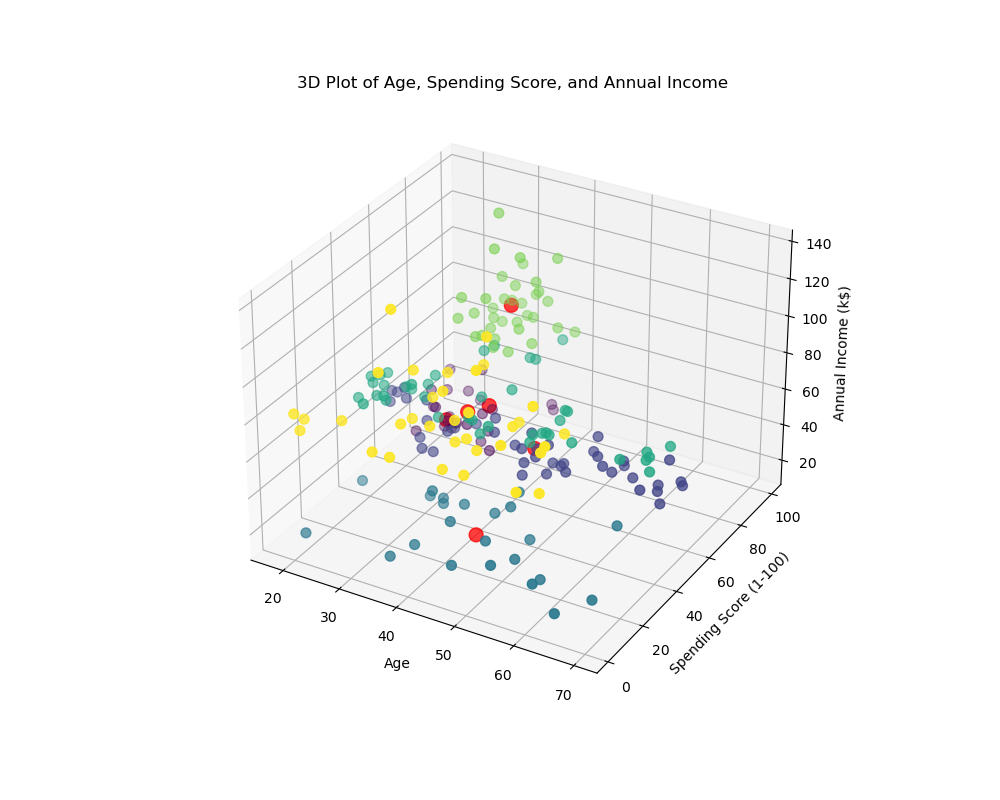

In [15]:
# widget is compatable with vscode
# inline renders as image 
# notebook if run in notebook
%matplotlib widget 
# %matplotlib inline
# %matplotlib notebook 

#  Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Age, Spending Score, Annual Income
ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'], c=labels, s=50, cmap='viridis')
ax.scatter(kmeans.centroids[:, 1], kmeans.centroids[:, 3], kmeans.centroids[:, 2], c='red', s=100, alpha=0.75)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('3D Plot of Age, Spending Score, and Annual Income')

plt.show()